In [1]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec



from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

custom_colors = ['#153243', '#284b63',
                 '#4d7ea8', #'#90a9c7',
                 #'#a1b4cf',
                 '#b6c2d9',
                '#ffffff', '#f5f5f5', #'#DFE2DF', '#E5D7B6',
                  '#EBCC8C', '#F7B538',
                 '#DB7C26', '#D8572A','#780116']#, '#242325']

pmap = LinearSegmentedColormap.from_list('', custom_colors)
pmap.reversed();

In [2]:
data2 = np.genfromtxt('dark_comet_data.csv',delimiter=',',dtype=str,usecols=np.arange(0,21))#,skip_header=14)


In [3]:

numobjects = 14
A2 = np.zeros(numobjects)
A1 = np.zeros(numobjects)
A3 = np.zeros(numobjects)
mag = np.zeros(numobjects)
TJ=np.zeros(numobjects)

a_DC= np.zeros(numobjects)
e_DC=np.zeros(numobjects)
i_DC=np.zeros(numobjects)

cnt=0
for i in np.arange(2,len(data2)):

    try:
        if (np.abs(float(data2[i][17])) >2.5):
            A2[cnt]= float(data2[i][15])
    except:
        pass
    try:
        if (np.abs(float(data2[i][14])) >2.5):
            A1[cnt]= float(data2[i][12])
    except:
        pass
    try:
        if (np.abs(float(data2[i][20])) >2.5):
            A3[cnt]= float(data2[i][18])
    except:
        pass
    try:
        mag[cnt]=float(data2[i][7])
    except:
        pass
    try:
        TJ[cnt]=float(data2[i][6])
    except:
        pass
    try:
        a_DC[cnt]=float(data2[i][2])
    except:
        pass
    try:
        e_DC[cnt]=float(data2[i][3])
    except:
        pass
    try:
        i_DC[cnt]=float(data2[i][4])
    except:
        pass
    cnt+=1


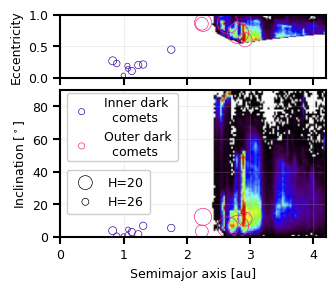

In [4]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2, 1, tight_layout=False,figsize=(8.7*cm,8.7*cm),sharex=True,sharey=False
                       ,gridspec_kw={'hspace': -0.2, 'wspace': 0.})

image = plt.imread('JFCavse.jpg')
axs[0].imshow(image,origin='upper',extent=[0,4.2,0,1])#aspect=2.807)#, extent=extent)

image2 = plt.imread('JFCavsi.jpg')
axs[1].imshow(image2,origin='upper',extent=[0,4.2,0,90],aspect='auto')#, extent=extent)

linewidth=0.5
im1 = axs[0].scatter(a_DC[(TJ<3.1) & (TJ>1)],e_DC[(TJ<3.1) & (TJ>1)],marker='o',
                  color='none',edgecolor='#f72585',lw=linewidth,
                  s=1e4*10**(-0.1*mag[(TJ<3.1) & (TJ>1)]),label='Outer dark comets')

im2 = axs[0].scatter(a_DC[(TJ>3.1)],e_DC[(TJ>3.1)],marker='o',
                  color='none',edgecolor='#3a0ca3',lw=linewidth,
                  s=1e4*10**(-0.1*mag[(TJ>3.1)]),label='Inner dark comets')


im8 = axs[1].scatter(100,100,marker='o',
                  color='none',edgecolor='#3a0ca3',lw=linewidth,
                  s=20,label='Inner dark \n  comets')

im9 = axs[1].scatter(100,100,marker='o',
                  color='none',edgecolor='#f72585',lw=linewidth,
                  s=20,label='Outer dark \n  comets')


im11 = axs[1].scatter(100,
                  100,
                  marker='o',
                  color='none',edgecolor='k',lw=linewidth,s=1e4*10**(-0.1*20),label='H=20')
im12 = axs[1].scatter(100,
                  100,
                  marker='o',
                  color='none',edgecolor='k',lw=linewidth,s=1e4*10**(-0.1*23),label='H=23')
im13 = axs[1].scatter(100,
                  100,
                  marker='o',
                  color='none',edgecolor='k',lw=linewidth,s=1e4*10**(-0.1*26),label='H=26')

axs[0].set_xlim(0,4.2)
axs[0].set_ylim(0,1)

axs[1].set_xlim(0,4.2)
axs[1].set_ylim(0,90)

l2=axs[1].legend(handles=[im8,im9],fancybox=True, framealpha=1, facecolor='white',
           shadow=False, borderpad=.2,bbox_to_anchor=(.0,1.02),
           frameon=True, loc='upper left', ncol=1)#,prop={'size': 12},facecolor='none')

l3=axs[1].legend(handles=[im11,im13],fancybox=True, framealpha=1,facecolor='white',
           shadow=False, borderpad=.5,bbox_to_anchor=(0.,.5),
           frameon=True, loc='upper left', ncol=1)#,prop={'size': 12},facecolor='none')

axs[1].add_artist(l2)

im1_inc = axs[1].scatter(a_DC[(TJ<3.1) & (TJ>1)],i_DC[(TJ<3.1) & (TJ>1)],marker='o',
                  color='none',edgecolor='#f72585',lw=linewidth,
                  s=1e4*10**(-0.1*mag[(TJ<3.1) & (TJ>1)]),label='Outer dark comets')

im2_inc = axs[1].scatter(a_DC[(TJ>3.1)],i_DC[(TJ>3.1)],marker='o',
                  color='none',edgecolor='#3a0ca3',lw=linewidth,
                  s=1e4*10**(-0.1*mag[(TJ>3.1)]),label='Inner dark comets')

axs[0].grid(alpha=0.2)

axs[1].grid(alpha=0.2)

axs[0].set_ylabel(r'Eccentricity')
axs[1].set_xlabel(r'Semimajor axis [au]')

axs[1].set_ylabel(r'Inclination [$^\circ$]')
plt.savefig('Figure13_NEOMod_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)
